# Tema 1

## Ejercicio 1

Comprobar que la transformada de Fourier de una gaussiana es otra gaussiana

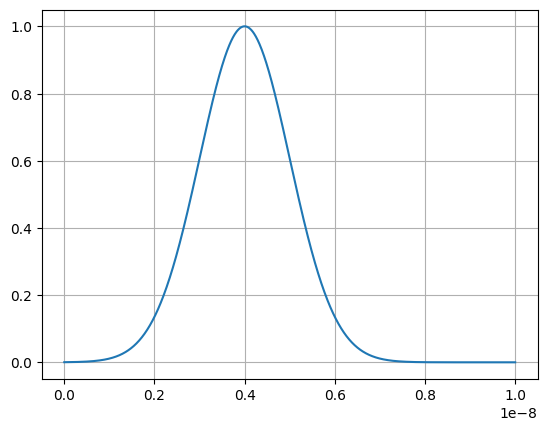

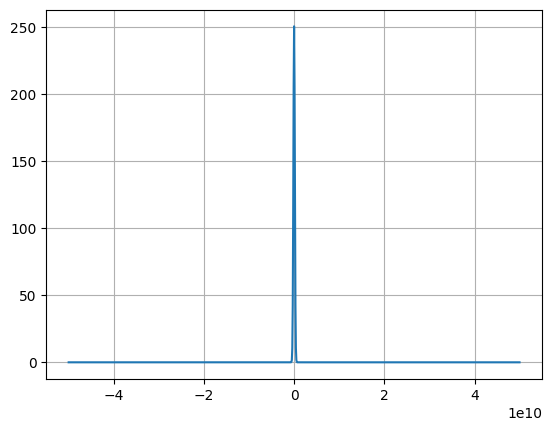

In [42]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

t = np.linspace(0, 10e-9, num = 1001) 
dt = t[1]-t[0]
t0 = 4e-9
s0 = 1e-9
gauss = np.exp( - (t-t0)**2 / (2*s0**2) )

plt.plot(t, gauss)
plt.grid()
plt.show()

freq = fft.fftshift(fft.fftfreq(len(gauss), dt)) #El fftshift es para ordenar las frecuencias
fgauss = fft.fftshift(fft.fft(gauss))


plt.plot(freq, np.abs(fgauss)) 
plt.grid()
plt.show()

## Ejercicio 2

Cómo hacer una animación: Gaussiana que se mueve

In [43]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 1001)

x_0 = 3 #centro de la gaussiana
s0 = 1 #spread = anchura de la gaussiana

c = 1 #velocidad a la que se mueve la gaussiana

for t in range(10):

    gauss = np.exp(- (x-x_0-c*t)**2 / (2*s0**2))

    #plt.plot(x, gauss)
    #plt.grid()
    #plt.ylim(-0.1, 1.1)
    #plt.xlim(x[0], x[-1])
    #plt.pause(0.1)
    #plt.cla()

#Nota: Jupyter NO hace animaciones, saca todas las gráficas una a una. La animación está en "animacion_gauss.py".




## Ejercicio 3

FDTD:

\begin{equation}
    \epsilon \partial_t E = -\partial_x H 
\end{equation}

\begin{equation}
    \mu \partial_t H = -\partial_x E
\end{equation}

El esquema sería:

\begin{equation}
E^{n+1}_i = -\frac{\Delta t}{\Delta x\epsilon}(H^{n-\frac{1}{2}}_{i+\frac{1}{2}}-H^{n-\frac{1}{2}}_{i-\frac{1}{2}}) + E^n_i
\end{equation}

\begin{equation}
H^{n+\frac{1}{2}}_i = -\frac{\Delta t}{\Delta x\mu}(E^{n+1}_{i+1}-E^{n+1}_{i}) + H^{n-\frac{1}{2}}_{i+\frac{1}{2}}
\end{equation}

In [45]:
import numpy as np
import matplotlib.pyplot as plt

#Constantes universales

eps = 1.0 #sistema natural: c0 = epsilon = mu = 1 --> el tiempo NO estará en segundos
mu  = 1.0
c0 = 1/np.sqrt(eps*mu)

CFL = 0.9 #parámetro de la condición CFL

#Posiciones del grid primario

x = np.linspace(0, 10, num = 101) #Cogemos 101 porque como empieza en 0, debemos coger 'uno de más' para que (p.e) vaya en 0.1
xDual = (x[1:] + x[:-1])/2 #Son las posiciones que están en el centro de cada lugar de la malla principal.

dx = x[1] - x[0]

#NOTA: el xDual tiene un nodo menos --> el campo mágnetico (que 'vive' en el dual) tendrá un punto menos

#Condición inicial de los campos

x0 = 3.0
s0 = 0.75 #Para evitar componentes significativas del campo en la frontera

e = np.exp(- (x-x0)**2 / (2*s0**2))
e[0] = 0.0 #condiciones de contorno
e[-1] = 0.0

h = np.zeros(xDual.shape) #xDual.shape te devuelve la dimension de xDual --> h tiene el mismo número de nodos que xDual

#Evolucion temporal

dt = CFL * dx/c0 
tRange = np.arange(0, 3, dt) #np.arange es igual que np.linspace pero indicas el paso en lugar del número de nodos

eNew = np.zeros(e.shape)
hNew = np.zeros(h.shape)

for t in tRange:

    eNew[1:-1] = - dt/(dx*eps) * (h[1:]-h[:-1])+e[1:-1]
    e[1:-1] = eNew[1:-1]

    hNew[:] = - dt/(dx*mu) * (e[1:]-e[:-1])+h[:]
    h[:] = hNew[:]
    
    
plt.plot(x, e, '.-')
plt.plot(xDual, h, '.-')
plt.xlim(-0.1, 10.1)
plt.ylim(-1.1, 1.1)

#La animación está en "ejercicio_3_fdtd1.py"

## Distintos medios

Si no estamos en el vacío aparece el término de corrientes óhmicas (como solo hay una dimensión $J = \sigma E$):

\begin{equation}
    \sigma E + \epsilon \partial_t E = -\partial_x  H 
\end{equation}

El esquema sería:

\begin{equation}

\sigma_iE_i^{n-\frac{1}{2}}+\epsilon_i\frac{E^n_i-E^{n-1}_i}{\Delta t}  =  -\frac{(H^{n-\frac{1}{2}}_{i+\frac{1}{2}}-H^{n-\frac{1}{2}}_{i-\frac{1}{2}})}{\Delta x} 

\end{equation}

Pero ahora necesitamos el término $E_i^{n-\frac{1}{2}}$ que en principio no lo tenemos definido (la malla del campo eléctrico está definida en puntos enteros). Transformamos dicho término en la media entre el anterior y el siguiente, quedando:

\begin{equation}

\sigma_i\frac{E_i^{n}+E_i^{n-1}}{2}+\epsilon_i\frac{E^n_i-E^{n-1}_i}{\Delta t}  =  -\frac{(H^{n-\frac{1}{2}}_{i+\frac{1}{2}}-H^{n-\frac{1}{2}}_{i-\frac{1}{2}})}{\Delta x} 

\end{equation}

Y ya podemos despejar de manera explícita el término que nos interesa en este paso temporal, $E_i^n$:

\begin{equation}

E_i^n = -\frac{\frac{(H^{n-\frac{1}{2}}_{i+\frac{1}{2}}-H^{n-\frac{1}{2}}_{i-\frac{1}{2}})}{\Delta x} + (\frac{\sigma_i}{2}-\frac{\epsilon_i}{\Delta t})E_i^{n-1}}{\frac{\sigma_i}{2}+\frac{\epsilon_i}{\Delta t}}

\end{equation}

### Sin conductividad ($\sigma$)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Posiciones del grid primario

L = 10
x = np.linspace(0, 10, num = 101) #Cogemos 101 porque como empieza en 0, debemos coger 'uno de más' para que (p.e) vaya en 0.1
xDual = (x[1:] + x[:-1])/2 #Son las posiciones que están en el centro de cada lugar de la malla principal.

dx = x[1] - x[0]

#NOTA: el xDual tiene un nodo menos --> el campo mágnetico (que 'vive' en el dual) tendrá un punto menos

#Permitividades y velocidad de la luz. La mitad del espacio va a ser vacío y el otro no.

eps = np.ones(x.shape)
eps[x>=L/2] = 5.0

mu  = 1.0
c0 = 1

CFL = 0.9 #parámetro de la condición CFL


#Condición inicial de los campos

x0 = 2.0
s0 = 0.5 #Para evitar componentes significativas del campo en la frontera

e = np.exp(- (x-x0)**2 / (2*s0**2))
e[0] = 0.0 #condiciones de contorno
e[-1] = 0.0

h = np.zeros(xDual.shape) #xDual.shape te devuelve la dimension de xDual --> h tiene el mismo número de nodos que xDual

#Evolucion temporal

dt = CFL * dx/c0 #Cuidado con esto porque he tenido que quitar c0 que estaba definido con eps
tRange = np.arange(0, 15, dt) #np.arange es igual que np.linspace pero indicas el paso en lugar del número de nodos


for t in tRange:

    e[1:-1] = - dt/(dx*eps[1:-1]) * (h[1:]-h[:-1])+e[1:-1]
    h[:] = - dt/(dx*mu) * (e[1:]-e[:-1])+h[:]
    
    
plt.plot(x, e, '.-')
plt.plot(xDual, h, '.-')
plt.vlines(L/2, -1.1, 1.1) #Hace una línea donde cambia el medio
plt.xlim(-0.1, 10.1)
plt.ylim(-1.1, 1.1)

#La animación está en "ejercicio_4_fdtd.py"

### Con conductividad

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Posiciones del grid primario

L = 20
x = np.linspace(0, L, num = 121) #Cogemos 101 porque como empieza en 0, debemos coger 'uno de más' para que (p.e) vaya en 0.1
xDual = (x[1:] + x[:-1])/2 #Son las posiciones que están en el centro de cada lugar de la malla principal.

dx = x[1] - x[0]

#NOTA: el xDual tiene un nodo menos --> el campo mágnetico (que 'vive' en el dual) tendrá un punto menos

#Permitividades, conductividad y  velocidad de la luz. La mitad del espacio va a ser vacío y el otro no.

eps = np.ones(x.shape)
eps[x>=L/2] = 5.0

sigma = np.zeros(x.shape)
sigma[x>=L/2] = 0.5

mu  = 1.0
c0 = 1

CFL = 0.9 #parámetro de la condición CFL


#Condición inicial de los campos

x0 = 7.0
s0 = 0.5 #Para evitar componentes significativas del campo en la frontera

e = np.exp(- (x-x0)**2 / (2*s0**2))
e[0] = 0.0 #condiciones de contorno
e[-1] = 0.0

h = np.zeros(xDual.shape) #xDual.shape te devuelve la dimension de xDual --> h tiene el mismo número de nodos que xDual

#Evolucion temporal

dt = CFL * dx #Cuidado con esto porque he tenido que quitar c0 que estaba definido con eps
tRange = np.arange(0, 25, dt) #np.arange es igual que np.linspace pero indicas el paso en lugar del número de nodos


for t in tRange:
    
    alpha = sigma[1:-1]/2 + eps[1:-1]/dt
    beta = sigma[1:-1]/2 - eps[1:-1]/dt
    e[1:-1] = - (h[1:]-h[:-1])/(alpha*dx) - beta[:]/alpha * e[1:-1]
    h[:] = - dt/(dx*mu) * (e[1:]-e[:-1])+h[:]
    
    

plt.plot(x, e, '.-')
plt.plot(xDual, h, '.-')
plt.vlines(L/2, -2.1, 2.1) #Hace una línea donde cambia el medio
plt.ylim(-2.1, 2.1)
plt.xlim(-0.1, 20.1)

#La animación está en "ejercicio_4.2_fdtd.py"

#### Podemos cambiar la condición inicial del campo magnético

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Posiciones del grid primario

L = 20
x = np.linspace(0, L, num = 121) #Cogemos 101 porque como empieza en 0, debemos coger 'uno de más' para que (p.e) vaya en 0.1
xDual = (x[1:] + x[:-1])/2 #Son las posiciones que están en el centro de cada lugar de la malla principal.

dx = x[1] - x[0]

#NOTA: el xDual tiene un nodo menos --> el campo mágnetico (que 'vive' en el dual) tendrá un punto menos

#Permitividades, conductividad y  velocidad de la luz. La mitad del espacio va a ser vacío y el otro no.

eps = np.ones(x.shape)
eps[x>=L/2] = 5.0

sigma = np.zeros(x.shape)
sigma[x>=L/2] = 0.01

mu  = 1.0
c0 = 1

CFL = 0.9 #parámetro de la condición CFL


#Condición inicial de los campos

x0 = 7.0
s0 = 0.5 #Para evitar componentes significativas del campo en la frontera

e = np.exp(- (x-x0)**2 / (2*s0**2))
e[0] = 0.0 #condiciones de contorno
e[-1] = 0.0

h = - e[:] #xDual.shape te devuelve la dimension de xDual --> h tiene el mismo número de nodos que xDual

#Evolucion temporal

dt = CFL * dx #Cuidado con esto porque he tenido que quitar c0 que estaba definido con eps
tRange = np.arange(0, 25, dt) #np.arange es igual que np.linspace pero indicas el paso en lugar del número de nodos


for t in tRange:
    
    alpha = sigma[1:-1]/2 + eps[1:-1]/dt
    beta = sigma[1:-1]/2 - eps[1:-1]/dt
    e[1:-1] = - (h[1:]-h[:-1])/alpha - beta[:]/alpha * e[1:-1]
    h[:] = - dt/(dx*mu) * (e[1:]-e[:-1])+h[:]
    
    

plt.plot(x, e, '.-')
plt.plot(xDual, h, '.-')
plt.vlines(L/2, -2.1, 2.1) #Hace una línea donde cambia el medio
plt.ylim(-2.1, 2.1)
plt.xlim(-0.1, 20.1)

#La animación está en "ejercicio_4.3_fdtd.py"

#Aparece una ondita muy chiquita hacia atrás. Esto se debe a que aunque pensemos que estamos poniendo lo mismo en el campo electrico y magnético, 
#realmente el campo magnético "vive" medio paso temporal hacia delante --> deberíamos tener esto en cuanta para que los campos no estén desfasados. 

### Harmonic function approximation: el error asociado al método fdtd

Tanto el error en la derivada como en la media:

\begin{equation}
\epsilon_\partial, \epsilon_{med} \propto \frac{1}{r^2_\nu}
\end{equation}

Donde $r_\nu = \frac{\lambda_\nu}{\Delta\nu}$ y $\nu$ es la frecuencia de la señal armónica que intentamos aproximar (la onda del campo).

## Condiciones de contorno

### Conductor eléctrico perfecto (PEC):

\begin{equation}
n \times (E_2-E_1) = 0 \rightarrow E_1^n = E_2^n = 0
\end{equation}

En el interior del PEC (en $E_1$) no hay campo eléctrico en ningún tiempo, por lo que por continuidad del campo, en nuestra frontera con ese medio (que es la componente $E_2$) tampoco puede haber campo eléctrico.

(Es la condición que hemos estado haciendo hasta ahora)

### Conductor magnético perfecto (PMC):

\begin{equation}
n \times (H_{2}-H_{1}) = 0 \rightarrow E_1^{n+1} = E_1^{n-1}-2c_EH^n_{1+\frac{1}{2}}
\end{equation}

En este caso tenemos el PMC en $x=0$ (donde está $E_1$) pero nuestro campo magnético vive en la malla dual, es decir, en los índices $\pm \frac{1}{2}$. Lo que hacemos es añadir un nodo fantasma "dentro" del PMC, es decir, añadimos una componente del campo magnético $H_{1-\frac{1}{2}}$ y le ponemos el mismo valor de $H^n_{1+\frac{1}{2}}$ con signo contrario para que, al hacer la media, se anulen mutuamente. Así nos queda:

\begin{equation}
\epsilon\partial_tE = -\partial_x H \rightarrow \epsilon\frac{E_0^{n+1}-E_0^{n-1}}{\Delta t} = -\frac{H^n_{1+\frac{1}{2}}-H_{1-\frac{1}{2}^n}}{\Delta x} = - 2 \frac{H^n_{1+\frac{1}{2}}}{\Delta x}
\end{equation}

Notar que esta fórmula es para la frontera izquierda; para la derecha es similar.

Este caso no existe en la naturaleza pero nos sirve para significar ciertos problemas que presentan simetrías.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Constantes universales

eps = 1.0 #sistema natural: c0 = epsilon = mu = 1 --> el tiempo NO estará en segundos
mu  = 1.0
c0 = 1/np.sqrt(eps*mu)

CFL = 0.9 #parámetro de la condición CFL

#Posiciones del grid primario

x = np.linspace(0, 10, num = 101) #Cogemos 101 porque como empieza en 0, debemos coger 'uno de más' para que (p.e) vaya en 0.1
xDual = (x[1:] + x[:-1])/2 #Son las posiciones que están en el centro de cada lugar de la malla principal.

dx = x[1] - x[0]

#NOTA: el xDual tiene un nodo menos --> el campo mágnetico (que 'vive' en el dual) tendrá un punto menos

#Condición inicial de los campos

x0 = 5.0
s0 = 0.75 #Para evitar componentes significativas del campo en la frontera

e = np.exp(- (x-x0)**2 / (2*s0**2))
e[0] = 0.0 #condiciones de contorno
e[-1] = 0.0

h = np.zeros(xDual.shape) #xDual.shape te devuelve la dimension de xDual --> h tiene el mismo número de nodos que xDual

#Evolucion temporal

dt = CFL * dx/c0
tRange = np.arange(0, 10, dt) #np.arange es igual que np.linspace pero indicas el paso en lugar del número de nodos


for t in tRange:

    e[1:-1] = - dt/(dx*eps) * (h[1:]-h[:-1])+e[1:-1]

    e[0] = e[0] - 2*dt/(dx*eps)*h[0] #condición de contorno del lado izquierdo
    e[-1] = 0.0 #condición de contorno del lado derecho

    h[:] = - dt/(dx*mu) * (e[1:]-e[:-1])+h[:]


### Muro absorbente:

Imponemos que cualquier onda que provenga de la frontera se haga cero. 

\begin{equation}
(\partial_n+c_0^{-1}\partial_t)(n\times E)\mid_S = 0 \rightarrow \frac{E_1^{n}-E_0^{n}}{\Delta x}+
\end{equation}

### Condición periódica:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Constantes universales

eps = 1.0 #sistema natural: c0 = epsilon = mu = 1 --> el tiempo NO estará en segundos
mu  = 1.0
c0 = 1/np.sqrt(eps*mu)

CFL = 0.9 #parámetro de la condición CFL

#Posiciones del grid primario

x = np.linspace(0, 10, num = 101) #Cogemos 101 porque como empieza en 0, debemos coger 'uno de más' para que (p.e) vaya en 0.1
xDual = (x[1:] + x[:-1])/2 #Son las posiciones que están en el centro de cada lugar de la malla principal.

dx = x[1] - x[0]

#NOTA: el xDual tiene un nodo menos --> el campo mágnetico (que 'vive' en el dual) tendrá un punto menos

#Condición inicial de los campos

x0 = 5.0
s0 = 0.75 #Para evitar componentes significativas del campo en la frontera

e = np.exp(- (x-x0)**2 / (2*s0**2))
e[0] = 0.0 #condiciones de contorno
e[-1] = 0.0

h = np.zeros(xDual.shape) #xDual.shape te devuelve la dimension de xDual --> h tiene el mismo número de nodos que xDual

#Evolucion temporal

dt = CFL * dx/c0
tRange = np.arange(0, 10, dt) #np.arange es igual que np.linspace pero indicas el paso en lugar del número de nodos


for t in tRange:

    e[1:-1] = - dt/(dx*eps) * (h[1:]-h[:-1])+e[1:-1]

    e[0] = - dt/(dx*eps) * (h[0]-h[-1])+e[0] #condición de contorno del lado izquierdo
    e[-1] = e[0] #condición de contorno del lado derecho

    h[:] = - dt/(dx*mu) * (e[1:]-e[:-1])+h[:]